## Laplacian of Gaussian Edge Detection
By: Shawn Vosburg (260743167)  
Due: October 8th, 2018  
Class: ECSE 415, McGill University  
Assignment 1, LoG_edge.ipynb  


# Question 2.2 
*Apply a 5 × 5 Laplacian of Gaussian edge detector to the image ‘woman’.*

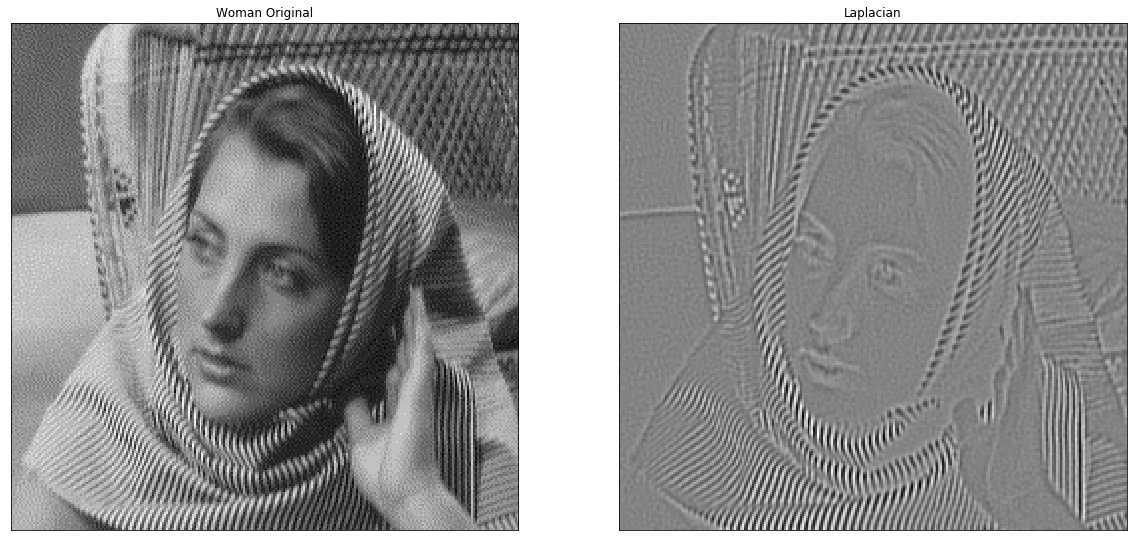

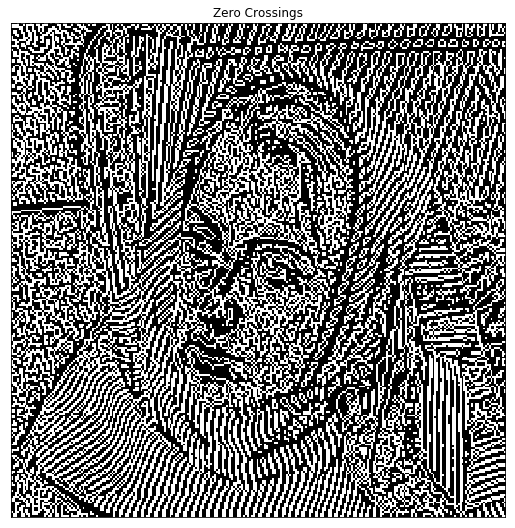

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#Q2.2.1 Laplacian edge detection
# load the image as grayscale
woman = cv2.imread('woman.png', cv2.IMREAD_GRAYSCALE)

# apply 15x15 Laplacian filter to the intensity channel
I_lap = cv2.Laplacian(woman, cv2.CV_16S, ksize=5)
def LaplacianZeroes(img):
    h, w = img.shape
    Edges = np.zeros((h,w))
    for x in range(h):
        for y in range(w):
            #Cover cases when Laplacian gives exactly 0
            if(img[x][y] == 0):
                Edges[x][y] = 255
            #Cover cases when Laplacian gives a negative beside a positive. 
            elif(img[x][y] < 0 and (img[max(x-1,0)][y] > 0 or img[min(x+1,h-1)][y] > 0 or img[x][max(y-1,0)] > 0 or img[x][min(y+1,w-1)] > 0)):
                Edges[x][y] = 255
               
    return Edges            
zeroCrossing = LaplacianZeroes(I_lap)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(woman, cmap="gray")
plt.title("Woman Original"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(I_lap, cmap="gray")
plt.title("Laplacian"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20, 20))
plt.subplot(221), plt.imshow(zeroCrossing, cmap="gray")
plt.title("Zero Crossings"), plt.xticks([]), plt.yticks([])
plt.show()